In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.model_selection import learning_curve

In [3]:
X, y = make_classification(1000, n_features = 20, n_informative =2 , n_redundant = 2, n_classes = 2, random_state = 0)

In [4]:
df = pd.DataFrame(np.hstack((X, y[:, None])), columns = range(21))

In [5]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.063780,0.676409,1.069356,-0.217580,0.460215,-0.399167,-0.079188,1.209385,-0.785315,-0.172186,...,-0.993119,0.306935,0.064058,-1.054233,-0.527496,-0.074183,-0.355628,1.057214,-0.902592,0.0
1,0.070848,-1.695281,2.449449,-0.530494,-0.932962,2.865204,2.435729,-1.618500,1.300717,0.348402,...,0.225324,0.605563,-0.192101,-0.068027,0.971681,-1.792048,0.017083,-0.375669,-0.623236,1.0
2,0.940284,-0.492146,0.677956,-0.227754,1.401753,1.231653,-0.777464,0.015616,1.331713,1.084773,...,-0.050120,0.948386,-0.173428,-0.477672,0.760896,1.001158,-0.069464,1.359046,-1.189590,1.0
3,-0.299517,0.759890,0.182803,-1.550233,0.338218,0.363241,-2.100525,-0.438068,-0.166393,-0.340835,...,1.178724,2.831480,0.142414,-0.202819,2.405715,0.313305,0.404356,-0.287546,-2.847803,1.0
4,-2.630627,0.231034,0.042463,0.478851,1.546742,1.637956,-1.532072,-0.734445,0.465855,0.473836,...,-1.061194,-0.888880,1.238409,-0.572829,-1.275339,1.003007,-0.477128,0.098536,0.527804,0.0
5,-0.262645,0.327590,0.997845,-1.577903,-0.828981,-0.202735,0.825932,-0.489252,0.849912,-0.035563,...,0.935624,1.741002,1.930498,0.069474,-0.643267,-0.257866,0.260081,-0.001670,-1.639319,1.0
6,-0.654570,-0.886904,-1.329892,-1.857483,2.929096,0.222858,0.207217,0.247706,0.382598,0.086453,...,-1.370070,-0.105818,-1.018279,-1.213570,0.583570,0.976038,-0.355495,0.878304,-0.596141,0.0
7,0.205797,-0.044140,0.072678,0.496615,0.239087,-0.607887,-1.306522,-0.543694,1.012133,0.571110,...,-0.917487,-1.006674,-1.093895,-0.386890,-0.973376,-0.933316,-0.205834,1.618459,0.748400,0.0
8,2.055266,1.323722,-0.589347,0.043032,-0.437169,0.596489,0.578273,0.356837,-0.115032,-0.773716,...,0.722205,0.595976,-0.724224,0.393920,-2.119441,-0.100956,1.436068,1.246674,-0.348215,1.0
9,-0.582943,-1.714165,-0.927825,-0.201992,0.758830,-0.709930,-1.552681,0.625355,-1.448826,-1.299395,...,-0.807542,-0.054289,-0.791719,-0.718975,2.110154,0.151147,1.906599,-0.049642,-0.361286,0.0


In [6]:
plt.figure(figsize = (12, 10))

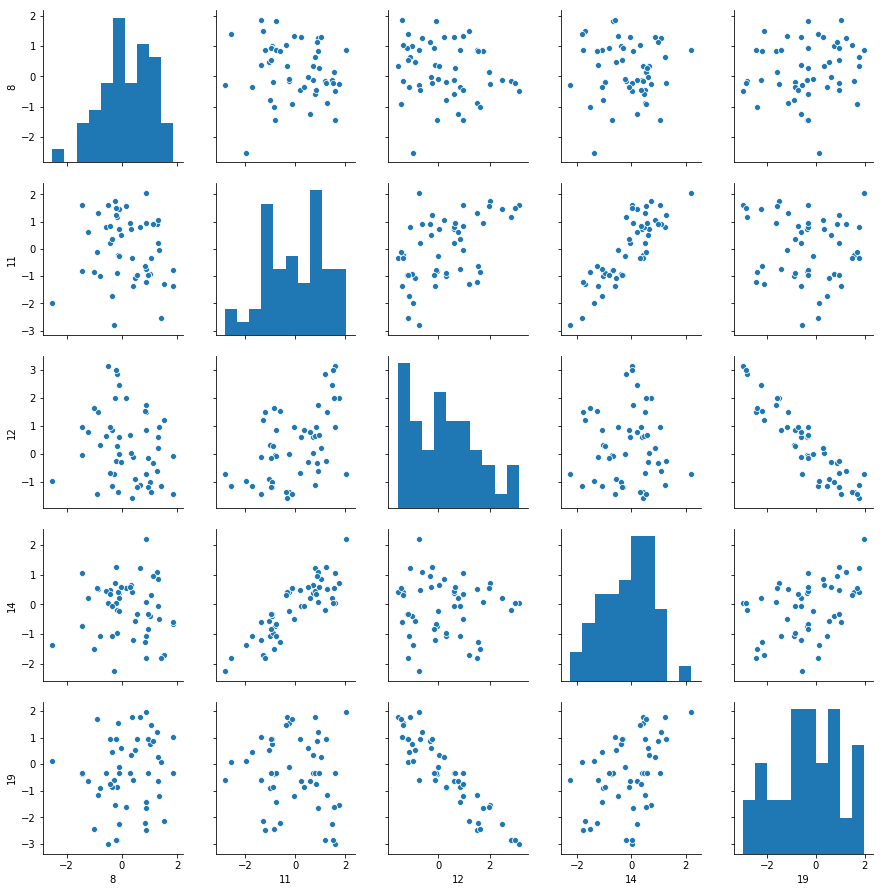

In [7]:
_ = sns.pairplot(df.loc[:50], vars = [8, 11, 12, 14, 19])

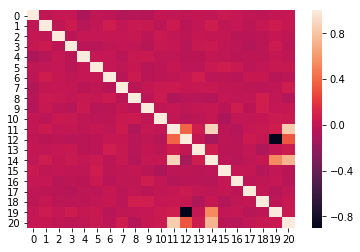

In [8]:
_ = sns.heatmap(df.corr())

In [12]:
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None, train_sizes = np.linspace(.1 , 1.0, 5)):
    
    plt.figure()
    train_sizes, train_scores, test_scores = learning_curve(estimattor, X, y, cv = 5, n_jobs = 1, train_sizes = train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid("on") 
    if ylim:
        plt.ylim(ylim)
    plt.title(title)
    plt.show()

In [13]:
plot_learning_curve(LinearSVC(C = 10.0), "LinearSVC(C = 10.0)", X, y, ylim = (0.8, 1.01),
            train_sizes = np.linspace(.05, 0.2, 5))

NameError: name 'estimattor' is not defined